# **Import Libraries**

In [45]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

# **Load Data**

In [46]:
data = pd.read_csv('iphone_clean.csv')
data

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,productVariant,productType
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13
2956,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13
2957,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13
2958,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13


# **Cleaning Data**

In [47]:
# Daftar stopwords
stop_words_en = set(stopwords.words("english"))
stop_words_en.add('phone')
stop_words_en.add('iphone')
stop_words_en.add('got')
stop_words_en.add('one')
stop_words_en.add('use')
stop_words_en.add('events')
stop_words_en.add('even')
stop_words_en.add('get')
stop_words_en.add('amazon')
stop_words_en.add('also')
stop_words_en.add('product')

# Fungsi untuk membersihkan teks satu per satu
def clean_single_review(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r"#[A-Za-z0-9]+", " ", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = text.lower().strip()
    filtered_words = [word for word in text.split() if word not in stop_words_en]
    return " ".join(filtered_words)

# Terapkan fungsi ke setiap baris di kolom reviewDescription
data['reviewDescription_cleaned'] = data['reviewDescription'].apply(clean_single_review)

In [48]:
data.to_csv('iphone_review_cleaned.csv', index=False)

In [49]:
df = pd.read_csv("iphone_review_cleaned.csv")
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,productVariant,productType,reviewDescription_cleaned
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,every thing good iphones nothing compared spee...
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,look fabulous android user switched apple perf...
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,tried flip camera recording facility added pau...
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,genuine
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,happy offer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,useless phon never buy heat n useless camera p...
2956,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,iam happy charger provided apple extra burden ...
2957,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,good
2958,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,charging mobile getting hot using mobile much ...


# **Membuat WordCloud**

In [50]:
def plot_wordcloud(df, product_type_col='productType', text_col='reviewDescription_cleaned', target_type=None):

    if target_type is None:
        print("Harap masukkan nama productType.")
        return
    
    text_data = " ".join(df[df[product_type_col] == target_type][text_col].dropna().astype(str))
    if not text_data:
        print(f"Tidak ada data untuk {target_type}")
        return

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud - {target_type}")
    plt.show()


def plot_top20_words(df, product_type_col='productType', text_col='reviewDescription_cleaned', target_type=None):

    if target_type is None:
        print("Harap masukkan nama productType.")
        return

    text_data = " ".join(df[df[product_type_col] == target_type][text_col].dropna().astype(str))
    if not text_data:
        print(f"Tidak ada data untuk {target_type}")
        return

    word_counts = Counter(text_data.split())
    top_20 = word_counts.most_common(20)
    
    if not top_20:
        print(f"Tidak ada cukup kata untuk {target_type}")
        return

    words, counts = zip(*top_20)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.title(f"Top 20 Words - {target_type}")
    plt.ylabel("Frequency")
    plt.xlabel("Words")
    plt.tight_layout()
    plt.show()

# **WordCloud Apple Iphone 13**

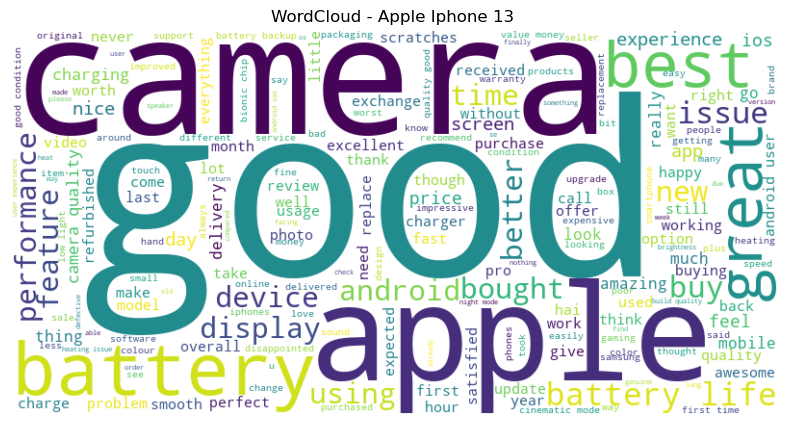

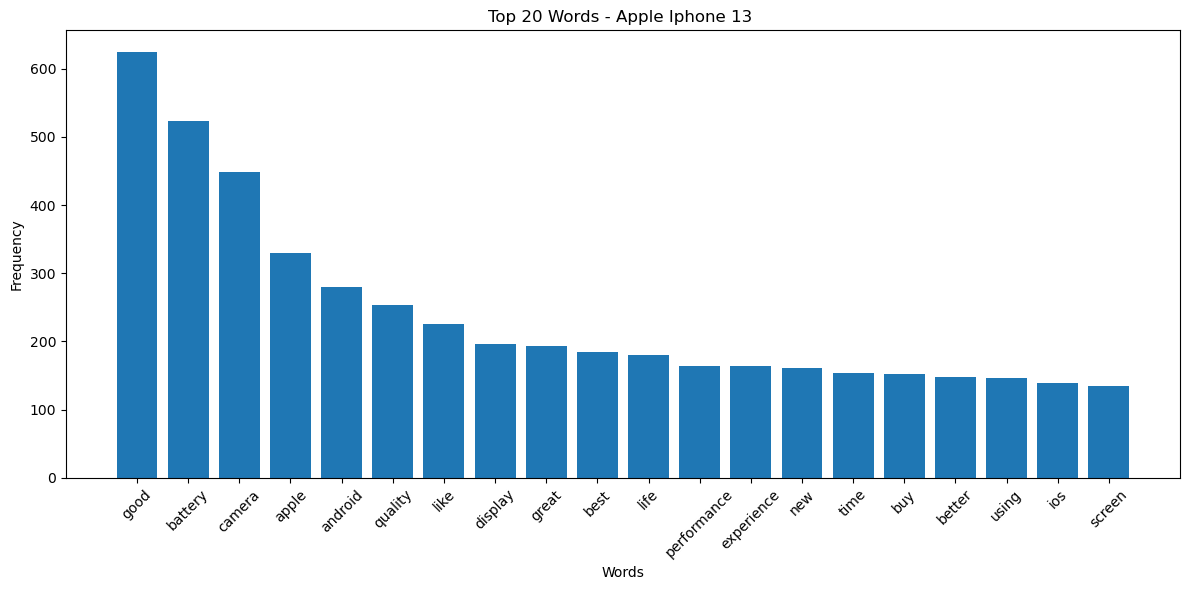

In [ ]:
#iphone 13
plot_wordcloud(df, target_type="Apple iPhone 13 ")
plot_top20_words(df, target_type="Apple iPhone 13 ")

### 1. good

In [53]:
filtered_good = df[
    (df["productType"].str.contains("Apple Iphone 13 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bgood\b", case=False, na=False))
]

filtered_good[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
0,Apple Iphone 13,every thing good iphones nothing compared spee...
7,Apple Iphone 13,good
10,Apple Iphone 13,honest review going broke buying depreciating ...
12,Apple Iphone 13,perfect highly recommend seller great price sa...
13,Apple Iphone 13,like quite reasonable comparing iphones good nice
...,...,...
2935,Apple Iphone 13,apart good camera things easy
2939,Apple Iphone 13,good apple running big scam offering extra exc...
2944,Apple Iphone 13,overall good somewhere price sucks realise cha...
2947,Apple Iphone 13,ki packing good nhi thi ok delivery boy ka beh...


dari tabel diatas, kata *good* yang terkandung pada review mengindikasikan bahwa product tersebut mengindikasikan kualitas produk yang baik dirasakan oleh reviewer sehingga kata tersebut termasuk sentimen positif.

### 2. like

In [ ]:
filtered_like = df[
    (df["productType"].str.contains("Apple Iphone 13 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\blike\b", case=False, na=False))
]

filtered_like[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1,Apple Iphone 13,look fabulous android user switched apple perf...
10,Apple Iphone 13,honest review going broke buying depreciating ...
13,Apple Iphone 13,like quite reasonable comparing iphones good nice
16,Apple Iphone 13,works fine nothing special camera good night e...
25,Apple Iphone 13,good like android
...,...,...
2873,Apple Iphone 13,biggest improvement noted battery life really ...
2892,Apple Iphone 13,apple increase performance device say garbage ...
2899,Apple Iphone 13,great love android apple different characters ...
2915,Apple Iphone 13,like


kata *like* pada konteks ini, mencerminkan sentimen positif, karena menggambarkan apresiasi terhadap performa, desain, atau nilai produk. Oleh karena itu, kata ini dapat dikategorikan sebagai pengalaman positif dari pengguna.

## 3. great

In [ ]:
filtered_great = df[
    (df["productType"].str.contains("Apple Iphone 13 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bgreat\b", case=False, na=False))
]

filtered_great[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
6,Apple Iphone 13,great nothing say name apple identity well rec...
10,Apple Iphone 13,honest review going broke buying depreciating ...
12,Apple Iphone 13,perfect highly recommend seller great price sa...
24,Apple Iphone 13,well balanced hd oled sdisplay colours accurat...
36,Apple Iphone 13,received timely working great improved lifesty...
...,...,...
2869,Apple Iphone 13,stellar device excels various aspects making t...
2899,Apple Iphone 13,great love android apple different characters ...
2907,Apple Iphone 13,tracking comparing battery performance mobile ...
2912,Apple Iphone 13,great buy


Kata "great" dalam konteks ini merupakan indikator sentimen positif yang kuat, karena menunjukkan rasa puas, kagum, atau bahkan rasa bangga dari reviewer terhadap produk Apple iPhone 13.

## 4. best

In [56]:
filtered_good = df[
    (df["productType"].str.contains("Apple Iphone 13 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bbest\b", case=False, na=False))
]

filtered_good[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
20,Apple Iphone 13,best
39,Apple Iphone 13,really wanted first loved sound quality great ...
40,Apple Iphone 13,things liked solid build quality polished soft...
44,Apple Iphone 13,using almost months issue facing camera qualit...
46,Apple Iphone 13,writing review using months pros camera clicks...
...,...,...
2876,Apple Iphone 13,best buy price give things premium choice know ok
2901,Apple Iphone 13,hope good best
2911,Apple Iphone 13,best k
2924,Apple Iphone 13,loved delivery bcz always best apple


Kata "best" pada konteks ini  merupakan ekspresi positif yang menunjukkan tingkat kepuasan tinggi terhadap produk Apple iPhone 13 berhasil memenuhi atau bahkan melebihi ekspektasi pengguna. Sehingga kata tersebut masuk dalam sentimen yang positif.

## 5. life

In [ ]:
filtered_life = df[
    (df["productType"].str.contains("Apple Iphone 13 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\blife\b", case=False, na=False))
]

filtered_life[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
10,Apple Iphone 13,honest review going broke buying depreciating ...
18,Apple Iphone 13,day delivery delivered days purchase thrice th...
38,Apple Iphone 13,finally upgraded trusty let tell feels like ti...
40,Apple Iphone 13,things liked solid build quality polished soft...
46,Apple Iphone 13,writing review using months pros camera clicks...
...,...,...
2869,Apple Iphone 13,stellar device excels various aspects making t...
2873,Apple Iphone 13,biggest improvement noted battery life really ...
2875,Apple Iphone 13,nice good range good iphones battery life conc...
2881,Apple Iphone 13,ordered apple gb getting shows abnormal batter...


kata *life* paling sering muncul dalam kalimat seperti *battery life* atau *daily life*, oleh karena itu, kata tersebut dalam konteks ini mencerminkan aspek kepuasan dan  kualitas jangka panjang, dan dapat dikategorikan sebagai sentimen positif terutama bila dikaitkan dengan peningkatan kenyamanan, efisiensi, atau produktivitas pengguna.

## 6. new

In [ ]:
filtered_new = df[
    (df["productType"].str.contains("Apple Iphone 13 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bnew\b", case=False, na=False))
]

filtered_new[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
22,Apple Iphone 13,nothing new features model changed
23,Apple Iphone 13,seals teared stricker put know whether new ref...
50,Apple Iphone 13,new purchased developing overheating using cha...
51,Apple Iphone 13,without doubt game changer avid apple user rec...
74,Apple Iphone 13,gb surpassed expectations every aspect setting...
...,...,...
2840,Apple Iphone 13,using almot month running smooth new network i...
2850,Apple Iphone 13,want hear reading review means already done en...
2869,Apple Iphone 13,stellar device excels various aspects making t...
2946,Apple Iphone 13,brand new overheating lot charging video calls...


Dari kata *new* pada produk iPhone 13 diatas mengindikasikan seperti produk baru dan pengalaman yang baru bagi pengguna ketika mencoba produk tersebut sehingga kata tersebut masuk kedalam sentimen positif.

## 7. time

In [ ]:
filtered_time = df[
    (df["productType"].str.contains("Apple Iphone 13 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\btime\b", case=False, na=False))
]

filtered_time[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
15,Apple Iphone 13,though talk lot high price iphones worth amoun...
38,Apple Iphone 13,finally upgraded trusty let tell feels like ti...
43,Apple Iphone 13,ios current version updated thw worst thing io...
54,Apple Iphone 13,dream always working proper processor strong m...
56,Apple Iphone 13,talking apple always costly always everything ...
...,...,...
2910,Apple Iphone 13,first time user confused buy though price diff...
2914,Apple Iphone 13,amazing first time user great user interface s...
2932,Apple Iphone 13,startup hangs wanted return time till th july ...
2941,Apple Iphone 13,adopter works days warranty time done


Kata *time* paling sering muncul dalam konteks seperti talk time, charging time, atau time to upgrade. Dalam konteks ini, kata tersebut mencerminkan aspek penggunaan yang berkelanjutan, peningkatan performa, atau efisiensi perangkat. Oleh karena itu, *time* dapat dikategorikan sebagai sentimen positif.

## 8. buy

In [ ]:
filtered_buy = df[
    (df["productType"].str.contains("Apple Iphone 13 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bbuy\b", case=False, na=False))
]

filtered_buy[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
10,Apple Iphone 13,honest review going broke buying depreciating ...
27,Apple Iphone 13,actually android user switched user experience...
43,Apple Iphone 13,ios current version updated thw worst thing io...
87,Apple Iphone 13,great buy
92,Apple Iphone 13,great buy
...,...,...
2938,Apple Iphone 13,bought within months display stopped working s...
2940,Apple Iphone 13,buy device getting high heat
2944,Apple Iphone 13,overall good somewhere price sucks realise cha...
2946,Apple Iphone 13,brand new overheating lot charging video calls...


Kata *buy* pada review sering digunakan untuk menyatakan keputusan pembelian, rekomendasi kepada orang lain, atau evaluasi apakah pembelian produk tersebut layak. Oleh karena itu, kata *buy* pada konteks ini merupakan sentimen yang positif.

## 9. better

In [ ]:
filtered_better = df[
    (df["productType"].str.contains("Apple Iphone 13 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bbetter\b", case=False, na=False))
]

filtered_better[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1,Apple Iphone 13,look fabulous android user switched apple perf...
10,Apple Iphone 13,honest review going broke buying depreciating ...
18,Apple Iphone 13,day delivery delivered days purchase thrice th...
40,Apple Iphone 13,things liked solid build quality polished soft...
43,Apple Iphone 13,ios current version updated thw worst thing io...
...,...,...
2862,Apple Iphone 13,good specifications different names better ppl...
2883,Apple Iphone 13,utter waste money days usage kept turning repe...
2891,Apple Iphone 13,bought first time used two weeks felt last red...
2916,Apple Iphone 13,first nothing better go absolutely fabulous


Kata *better* pada review sering digunakan untuk menunjukkan peningkatan kualitas dibandingkan produk atau pengalaman sebelumnya. Oleh karena itu, kata *better* dalam konteks review iPhone 13 dapat dikategorikan sebagai sentimen positif, karena menggambarkan adanya peningkatan dan keunggulan produk yang dirasakan langsung oleh pengguna.

## 10. using

In [ ]:
filtered_using = df[
    (df["productType"].str.contains("Apple Iphone 13 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\busing\b", case=False, na=False))
]

filtered_using[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1,Apple Iphone 13,look fabulous android user switched apple perf...
10,Apple Iphone 13,honest review going broke buying depreciating ...
24,Apple Iphone 13,well balanced hd oled sdisplay colours accurat...
38,Apple Iphone 13,finally upgraded trusty let tell feels like ti...
43,Apple Iphone 13,ios current version updated thw worst thing io...
...,...,...
2840,Apple Iphone 13,using almot month running smooth new network i...
2884,Apple Iphone 13,using continuously year updated screen white f...
2908,Apple Iphone 13,wrost phoneno battery backuphighly restriction...
2921,Apple Iphone 13,battery quality bad hence last long though usi...


Kata *using* dalam review produk mengacu pada pengalaman penggunaan langsung terhadap produk. Oleh karena itu, kata *using* dalam konteks review ini umumnya mencerminkan pengalaman langsung dalam penggunaan produk dan dapat mengarah pada sentimen positif.

# **WordCloud Apple Iphone 14**

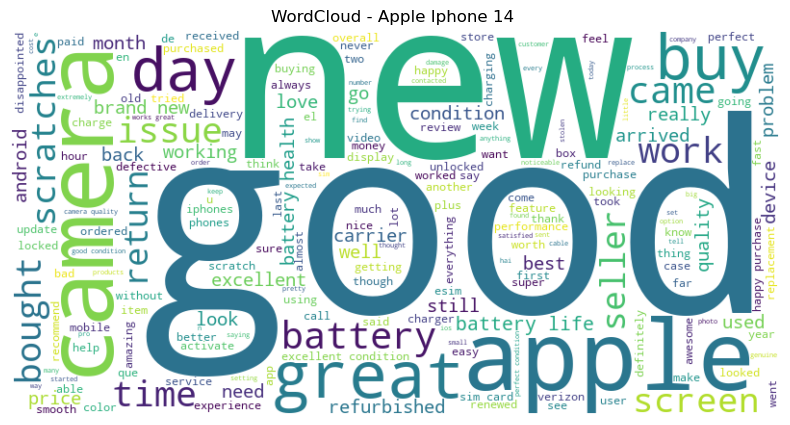

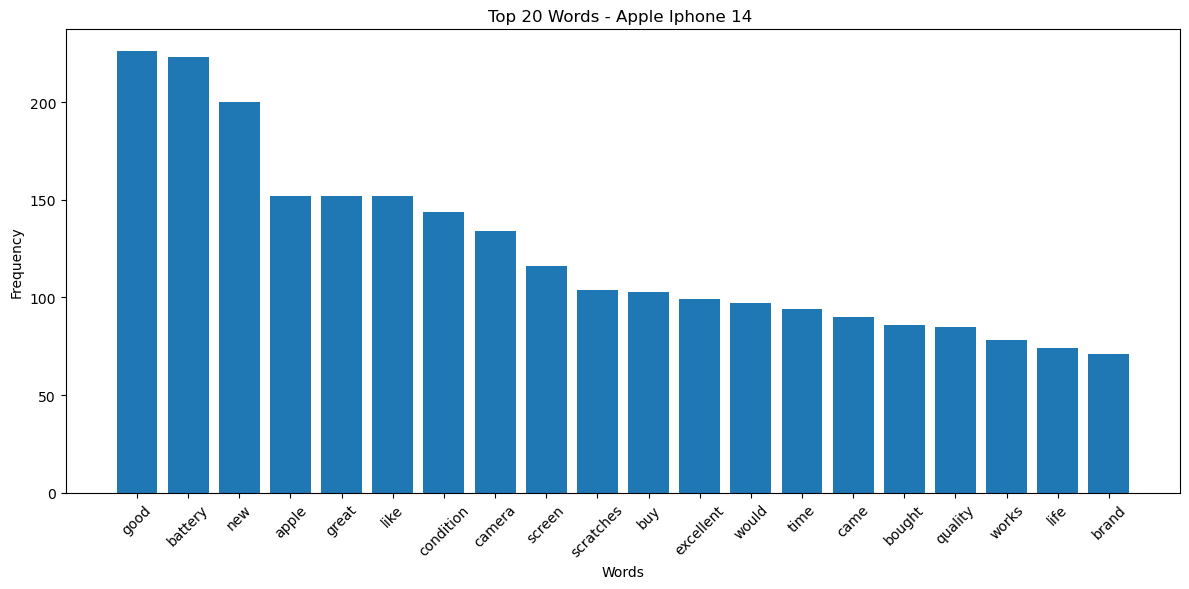

In [63]:
plot_wordcloud(df, target_type="Apple Iphone 14 ")
plot_top20_words(df, target_type="Apple Iphone 14 ")

## 1. good

In [64]:
filtered_good = df[
    (df["productType"].str.contains("Apple Iphone 14 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bgood\b", case=False, na=False))
]

filtered_good[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1056,Apple Iphone 14,good performance
1059,Apple Iphone 14,good nice camera quality sound quality good
1066,Apple Iphone 14,great signal rupee works camera good first work
1073,Apple Iphone 14,good low end
1075,Apple Iphone 14,good
...,...,...
2018,Apple Iphone 14,refurb listed prices excellent condition outsi...
2022,Apple Iphone 14,tried three different iphones price pretty goo...
2029,Apple Iphone 14,good quality
2036,Apple Iphone 14,trepidation ordering renewed totally alleviate...


Kata *good* dalam review iPhone 14 terkandung pada kalimat yang mengekspresikan kepuasan terhadap kualitas dan performa produk.  Sehingga kata tersebut termasuk kedalam sentimen positif, karena mencerminkan kepuasan terhadap fitur-fitur utama seperti performa, camera, dan kualitas keseluruhan dari iPhone 14. 

## 2. new

In [ ]:
filtered_new = df[
    (df["productType"].str.contains("Apple Iphone 14 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bnew\b", case=False, na=False))
]

filtered_new[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1053,Apple Iphone 14,new charging ke time bahut heat hota hai netwo...
1060,Apple Iphone 14,loved new colour really special
1068,Apple Iphone 14,brand new connect usb cable comes box charging...
1083,Apple Iphone 14,extremely disappointed received voice heard ca...
1099,Apple Iphone 14,new new feels love apple make look like new mo...
...,...,...
2030,Apple Iphone 14,screen scuff top right hardly noticeable priva...
2032,Apple Iphone 14,condition advertised excellent really like new...
2033,Apple Iphone 14,came looking brand new scratches dents came fu...
2036,Apple Iphone 14,trepidation ordering renewed totally alleviate...


kata *new* dalam review Iphone dalam konteks review iPhone 14 mencerminkan beragam sentimen, tergantung pada konteks penggunaannya. Sehingga Kata ini bersifat netral.

## 3. like

In [ ]:
filtered_like = df[
    (df["productType"].str.contains("Apple Iphone 14 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\blike\b", case=False, na=False))
]

filtered_like[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1068,Apple Iphone 14,brand new connect usb cable comes box charging...
1069,Apple Iphone 14,complete waste money move ios work transfer ch...
1070,Apple Iphone 14,feel like low light night time photos look ext...
1078,Apple Iphone 14,like sound quality camera ok ok zoom level low...
1086,Apple Iphone 14,getting hag voice going frequently den need sw...
...,...,...
2028,Apple Iphone 14,bought excellent condition starlight like came...
2032,Apple Iphone 14,condition advertised excellent really like new...
2034,Apple Iphone 14,worth price ordered gb starlight excellent con...
2039,Apple Iphone 14,came two days early perfect condition complain...


Kata "like" dalam review ini mengekspresikan ketertarikan atau kepuasan terhadap fitur tertentu sehingga kata *like* pada review ini  mengindikasikan sentimen positif.

## 4. scratches

In [ ]:
filtered_scratches = df[
    (df["productType"].str.contains("Apple Iphone 14 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bscratches\b", case=False, na=False))
]

filtered_scratches[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1269,Apple Iphone 14,scratches found camera edges paint peel kind f...
1288,Apple Iphone 14,good generally better android thinking applica...
1369,Apple Iphone 14,received good scratches damages delivery boy k...
1493,Apple Iphone 14,arrived many scratches screen case looks like ...
1499,Apple Iphone 14,immediately taking box started looking scratch...
...,...,...
2033,Apple Iphone 14,came looking brand new scratches dents came fu...
2035,Apple Iphone 14,love everything came battery health scratches ...
2040,Apple Iphone 14,screen distinct scratches camera lenses back d...
2041,Apple Iphone 14,perfect condition externally opened camera not...


kata *scratches* pada kalimat ini mengindikasikan sentimen yang negatif, sebab kata tersebut tekanduk dalam kalimat keluhan poduk yang dirasakan oleh pengguna.

## 5. buy

In [ ]:
filtered_buy = df[
    (df["productType"].str.contains("Apple Iphone 14 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bbuy\b", case=False, na=False))
]

filtered_buy[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1054,Apple Iphone 14,ok camera poor quality batter us buy samsung g...
1062,Apple Iphone 14,display durability battery addicted apple usin...
1070,Apple Iphone 14,feel like low light night time photos look ext...
1078,Apple Iphone 14,like sound quality camera ok ok zoom level low...
1083,Apple Iphone 14,extremely disappointed received voice heard ca...
...,...,...
2015,Apple Iphone 14,careful bought seller worked perfectly year to...
2023,Apple Iphone 14,like return looking faulty ended buy new model...
2024,Apple Iphone 14,buy outfit unless prepared waste hours verizon...
2028,Apple Iphone 14,bought excellent condition starlight like came...


kata *buy* pada iPhone 14 banyak terdapat pada kalimat yang mengandung keluhan seperti kekecewaan karena membeli produk, namun terdapat beberapa kalimat yang menyatakan senang dengan keputusan membeli produk, sehingga kata *buy* dapat disimpulkan sebagai sentimen yang negatif.

## 6. would

In [ ]:
filtered_would = df[
    (df["productType"].str.contains("Apple Iphone 14 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bwould\b", case=False, na=False))
]

filtered_would[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1086,Apple Iphone 14,getting hag voice going frequently den need sw...
1112,Apple Iphone 14,really excited buying really disappointed rece...
1171,Apple Iphone 14,first ever ordering particular colour size wan...
1277,Apple Iphone 14,great display great colour lightweight decent ...
1281,Apple Iphone 14,packaging upto mark flipkart extra packaging p...
...,...,...
2014,Apple Iphone 14,said advertisement unlocked carriers upon atte...
2028,Apple Iphone 14,bought excellent condition starlight like came...
2031,Apple Iphone 14,nice would recommend seller however particular...
2034,Apple Iphone 14,worth price ordered gb starlight excellent con...


kata *would* yang terkandung dalam review produk banyak terdapat ketika reviewer merasa produk yang dibeli memuaskan dan akan membeli atau merekomendasikan produknya sehingga kata tersebut termasuk dalam sentimen yang positif.

## 7. time

In [ ]:
filtered_time = df[
    (df["productType"].str.contains("Apple Iphone 14 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\btime\b", case=False, na=False))
]

filtered_time[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1053,Apple Iphone 14,new charging ke time bahut heat hota hai netwo...
1070,Apple Iphone 14,feel like low light night time photos look ext...
1078,Apple Iphone 14,like sound quality camera ok ok zoom level low...
1111,Apple Iphone 14,first time purchased great expectations disapp...
1112,Apple Iphone 14,really excited buying really disappointed rece...
...,...,...
1990,Apple Iphone 14,several light scratches screen though body min...
1994,Apple Iphone 14,bought mobile system daughter attempting insta...
1995,Apple Iphone 14,prestine condition almost like new reasonable ...
2023,Apple Iphone 14,like return looking faulty ended buy new model...


Kata "time" dominan bermakna negatif pada review product Iphone 14, karena muncul dalam kalimat yang menggambarkan pengalaman buruk seperti pemanasan berlebih (heating), performa kamera malam hari yang kurang memuaskan, atau kekecewaan secara umum terhadap pembelian. 

## 8. came

In [ ]:
filtered_came = df[
    (df["productType"].str.contains("Apple Iphone 14 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bcame\b", case=False, na=False))
]

filtered_came[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1252,Apple Iphone 14,brought model years back without physical dama...
1408,Apple Iphone 14,far goodthe packing awesome usually came charg...
1436,Apple Iphone 14,nothing much say anything brand purple color b...
1446,Apple Iphone 14,perfect delivery came time packaging perfect
1474,Apple Iphone 14,bought december son xmas activated january pro...
...,...,...
2028,Apple Iphone 14,bought excellent condition starlight like came...
2033,Apple Iphone 14,came looking brand new scratches dents came fu...
2034,Apple Iphone 14,worth price ordered gb starlight excellent con...
2035,Apple Iphone 14,love everything came battery health scratches ...


kata "came" digunakan untuk menggambarkan proses atau hasil pengiriman, dan mayoritas kalimat menunjukkan bahwa produk datang tepat waktu atau dalam kondisi baik. Oleh karena itu, penggunaan kata "came" dalam review iPhone 14 ini secara umum merefleksikan sentimen positif 

## 9. works

In [ ]:
filtered_works = df[
    (df["productType"].str.contains("Apple Iphone 14 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bworks\b", case=False, na=False))
]

filtered_works[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1066,Apple Iphone 14,great signal rupee works camera good first work
1130,Apple Iphone 14,apple provided defective charging cable attemp...
1219,Apple Iphone 14,genuine works really well thanks
1221,Apple Iphone 14,really great smooth operations works like butter
1355,Apple Iphone 14,features performing good may seem big differen...
...,...,...
2023,Apple Iphone 14,like return looking faulty ended buy new model...
2028,Apple Iphone 14,bought excellent condition starlight like came...
2032,Apple Iphone 14,condition advertised excellent really like new...
2037,Apple Iphone 14,works well


kata *works* yang terkandung pada review ini memiliki sentimen yang positif, sebab kata *works* yang terkandung pada review menunjukkan bahwa pengguna merasa produk yang digunakan berjalan dengan aman.

## 10. life

In [ ]:
filtered_life = df[
    (df["productType"].str.contains("Apple Iphone 14 ", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\blife\b", case=False, na=False))
]

filtered_life[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1069,Apple Iphone 14,complete waste money move ios work transfer ch...
1076,Apple Iphone 14,perfect update using earlier model absolutely ...
1078,Apple Iphone 14,like sound quality camera ok ok zoom level low...
1088,Apple Iphone 14,positive looks good batter life good picture q...
1108,Apple Iphone 14,overall good battery performance much good bat...
...,...,...
1945,Apple Iphone 14,nervous ordered noticed listing said acceptabl...
1949,Apple Iphone 14,cellphone described battery life terrible hour...
1980,Apple Iphone 14,great battery life great go day charge good wo...
1981,Apple Iphone 14,came looking brand new percent battery life wo...


kata *life* mayoritas digunakan dalam konteks battery life, yang menandakan sentimen positif, karena reviewer merasa puas dengan performa daya tahan baterai sebagai salah satu aspek penting dari smartphone.

# **Add RatingScore Category**

In [74]:
def classify_rating(score):
    if score in [5]:
        return 'Excellent'
    elif score in [4]:
        return 'Very Good'
    elif score in [3]:
        return 'Neutral'
    elif score in [2]:
        return 'Fair'
    else:
        return 'Poor'

df[''] = df['ratingScore'].apply(classify_rating)
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,productVariant,productType,reviewDescription_cleaned,
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,every thing good iphones nothing compared spee...,Very Good
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,look fabulous android user switched apple perf...,Excellent
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,tried flip camera recording facility added pau...,Very Good
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,genuine,Excellent
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,happy offer,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,useless phon never buy heat n useless camera p...,Poor
2956,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,iam happy charger provided apple extra burden ...,Fair
2957,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,good,Neutral
2958,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,charging mobile getting hot using mobile much ...,Poor


In [76]:
df.to_csv('iphone_review_cleaned.csv', index=False)

# **EDA**

## 1. Most Reviewed productType

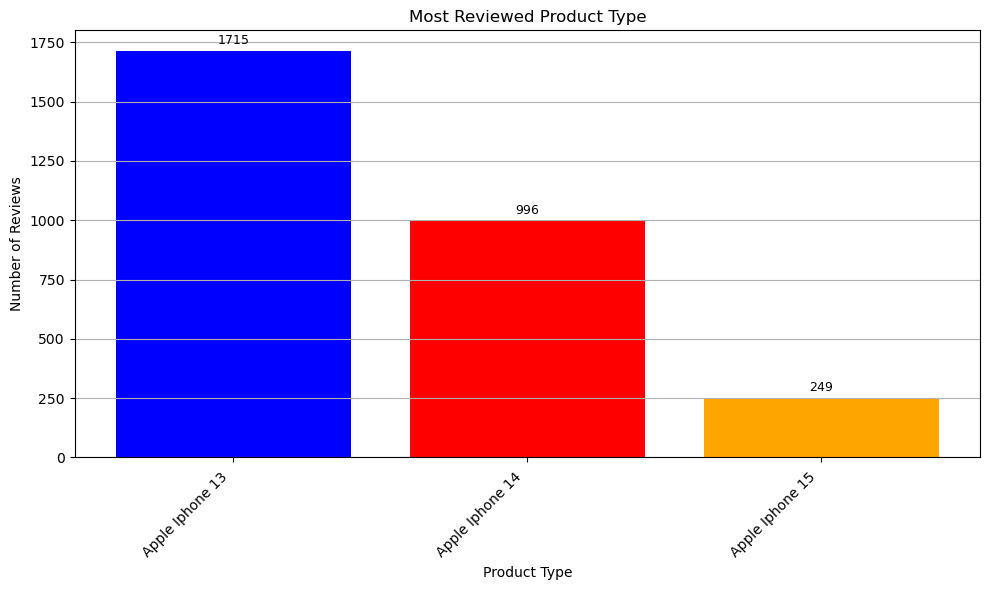

In [85]:
# Hitung top-selling product types
top_product_types = df['productType'].value_counts().sort_values(ascending=False)

colors = ['blue', 'red', 'orange', 'green', 'purple', 'cyan']  
color_list = colors[:len(top_product_types)]  

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_product_types.index, top_product_types.values, color=color_list)
plt.title("Most Reviewed Product Type")
plt.xlabel("Product Type")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.show()

In [ ]:
# Filter masing-masing iPhone
iphone13 = df[df['productType'] == 'Apple Iphone 13 ']['reviewDescription'].reset_index(drop=True)
iphone14 = df[df['productType'] == 'Apple Iphone 14 ']['reviewDescription'].reset_index(drop=True)
iphone15 = df[df['productType'] == 'Apple Iphone 15 ']['reviewDescription'].reset_index(drop=True)

# Samakan jumlah baris (pakai panjang terpendek agar seimbang).
min_len = min(len(iphone13), len(iphone14), len(iphone15))

# Gabungkan jadi satu DataFrame
comparison_df = pd.DataFrame({
    'iPhone 13 Reviews': iphone13[:min_len],
    'iPhone 14 Reviews': iphone14[:min_len],
    'iPhone 15 Reviews': iphone15[:min_len],
})

comparison_df.head(10)

,iPhone 13 Reviews,iPhone 14 Reviews,iPhone 15 Reviews
0,"Every thing is good about iPhones, there's not...",The what's up is getting hanged and when I am ...,Love it
1,"It look so fabulous, I am android user switche...",New I phone 14 256 charging ke time bahut heat...,Sound quality is very good. Performance is goo...
2,I tried to flip camera while recording but no ...,all are ok but camera it very poor quality ba...,100% ok
3,100% genuine,"iPhone is already broken when it got here, als...",it’s the best smart phone ( based on personal ...
4,Happy to get the iPhone 13 in Amazon offer,Good performance,Excellent phone
5,5 star 👍,Quality is goodAnd what else need to say about...,Ph acha h but 60 hz k refresh rate bahut slow ...
6,"Great Product... Nothing to say, as the Name A...",Nice,Everything is better than my iPhone 12 except ...
7,Good product 😀💯,"The phone is good ,has nice camera quality and...","If you don’t like using big sized phone , go f..."
8,Nice product,"Loved it ,new colour is really special",Phone is overall a beast specially in terms of...
9,Excellent product,The mobile is awesome but made fewer upgradati...,I was using iPhone 13 and switching to 15 was ...


Terlihat bahwa Iphone 13 mendapatkan review terbanyak dengan total review sebanyak hampir 1750 diikuti oleh Iphone 14 sejumlah 1000 review dan Iphone 15 yang hanya mencapai 250 review.

Tingginya jumlah review pada iphone 13 menunjukkan bahwa produk tersebut memiliki popularitas yang tinggi dan telah digunakan oleh lebih banyak kosumen dibadingkan 2 tipe iphone lainnya. Hal ini bisa disebabkan oleh beberapa faktor seperti :

- Iphone 13 lebih dahulu dirilis dan beredar dipasaran. Iphone 13 rilis pada September 24, 2021 sedangkan Iphone 14 dan Iphone 15 masing-masing rilis pada tahun 2022 dan 2023. Karena itu wajar jika Iphone 13 lebih banyak mengumpulkan review dari pada kedua series Iphone lainnya.

- Harga yang lebih murah dibandingkan 2 seri Iphone lainya. [Ketika peluncuran harga Iphone 13 dimulai $799 sedangkan untuk Iphone 14 dan Iphone 15 masing-masing dimulai dengan harga $799 dan setelah kedatangan model terbaru, harga iPhone 13 sempat turun ke sekitar US$599](https://everymac.com/systems/apple/iphone/iphone-faq/differences-between-iphone-12-iphone-13-models.html), membuat Iphone 13 lebih menarik bagi konsumen yang melihat harga. Harga yang lebih rendah ini mendukung minat pasar yang lebih cepat dan jumlah review yang lebih banyak.

- Tingginya kepuasan pengguna yang mendorong pemberian ulasan. Menurut media dari **Tom’s Guide dan Consumer Reports** menyebutkan iPhone 13 sebagai pilihan terbaik bagi yang memiliki anggaran terbatas karena layar cerah, daya tahan baterai, dan performa yang baik.

Dengan rilis yang lebih awal, harga lebih terjangkau, dan kepuasan pengguna yang tinggi, secara logis iPhone 13 berhasil menarik lebih banyak perhatian dan ulasan dibandingkan iPhone 14 atau iPhone 15.

## 2. Most Reviewed productType by Country

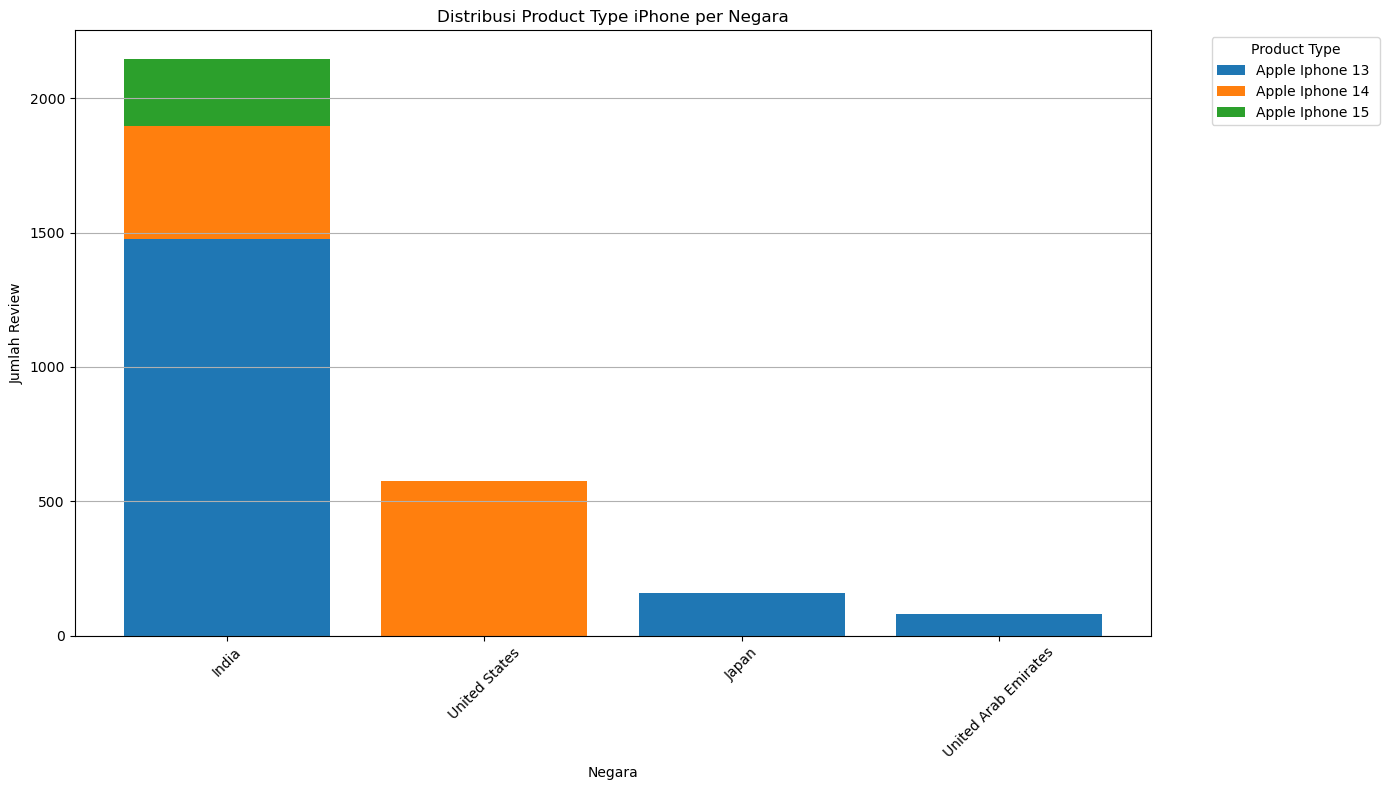

In [79]:
# Grouping dan pivot
review_counts = df.groupby(['country', 'productType']).size().reset_index(name='review_count')
pivot_table = review_counts.pivot(index='country', columns='productType', values='review_count').fillna(0)

top_countries = pivot_table.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_top = pivot_table.loc[top_countries]

# Plot stacked bar chart
plt.figure(figsize=(14, 8))
bottom = np.zeros(len(pivot_top))

for column in pivot_top.columns:
    plt.bar(pivot_top.index, pivot_top[column], bottom=bottom, label=column)
    bottom += pivot_top[column].values

plt.title("Distribusi Product Type iPhone per Negara")
plt.xlabel("Negara")
plt.ylabel("Jumlah Review")
plt.xticks(rotation=45)
plt.legend(title="Product Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Pada analisis dapat dilihat bahwa iPhone 13 memiliki jumlah review terbanyak yang berasal dari India, diikuti oleh Jepang dan Uni Emirat Arab. Hal ini dapat terjadi karena iPhone 13 telah beredar lebih lama di pasar global sejak peluncurannya pada September 2021. [Dan juga mulai diproduksi secara lokal di India pada awal 2022, yang memungkinkan distribusi lebih luas serta harga yang lebih kompetitif bagi konsumen lokal](https://www.tempo.co/digital/apple-berencana-produksi-iphone-13-di-india-mulai-februari-2022-442303) Ketersediaan yang tinggi serta aksesibilitas produk di India bisa menjadi faktor yang mendorong lebih banyak pengguna untuk menulis review, sehingga menghasilkan dominasi jumlah review dari negara tersebut.

Sementara itu, iPhone 14 menunjukkan jumlah ulasan terbanyak berasal dari Amerika Serikat, disusul oleh India. Untuk iPhone 15, jumlah ulasan secara keseluruhan masih tergolong rendah, namun distribusinya kembali menunjukkan bahwa India menyumbang jumlah review terbanyak di antara negara-negara lain. 

## 3. Distribution rating per productType

C:\Users\USER\AppData\Local\Temp\ipykernel_7504\3744120501.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, patch_artist=True, labels=labels)


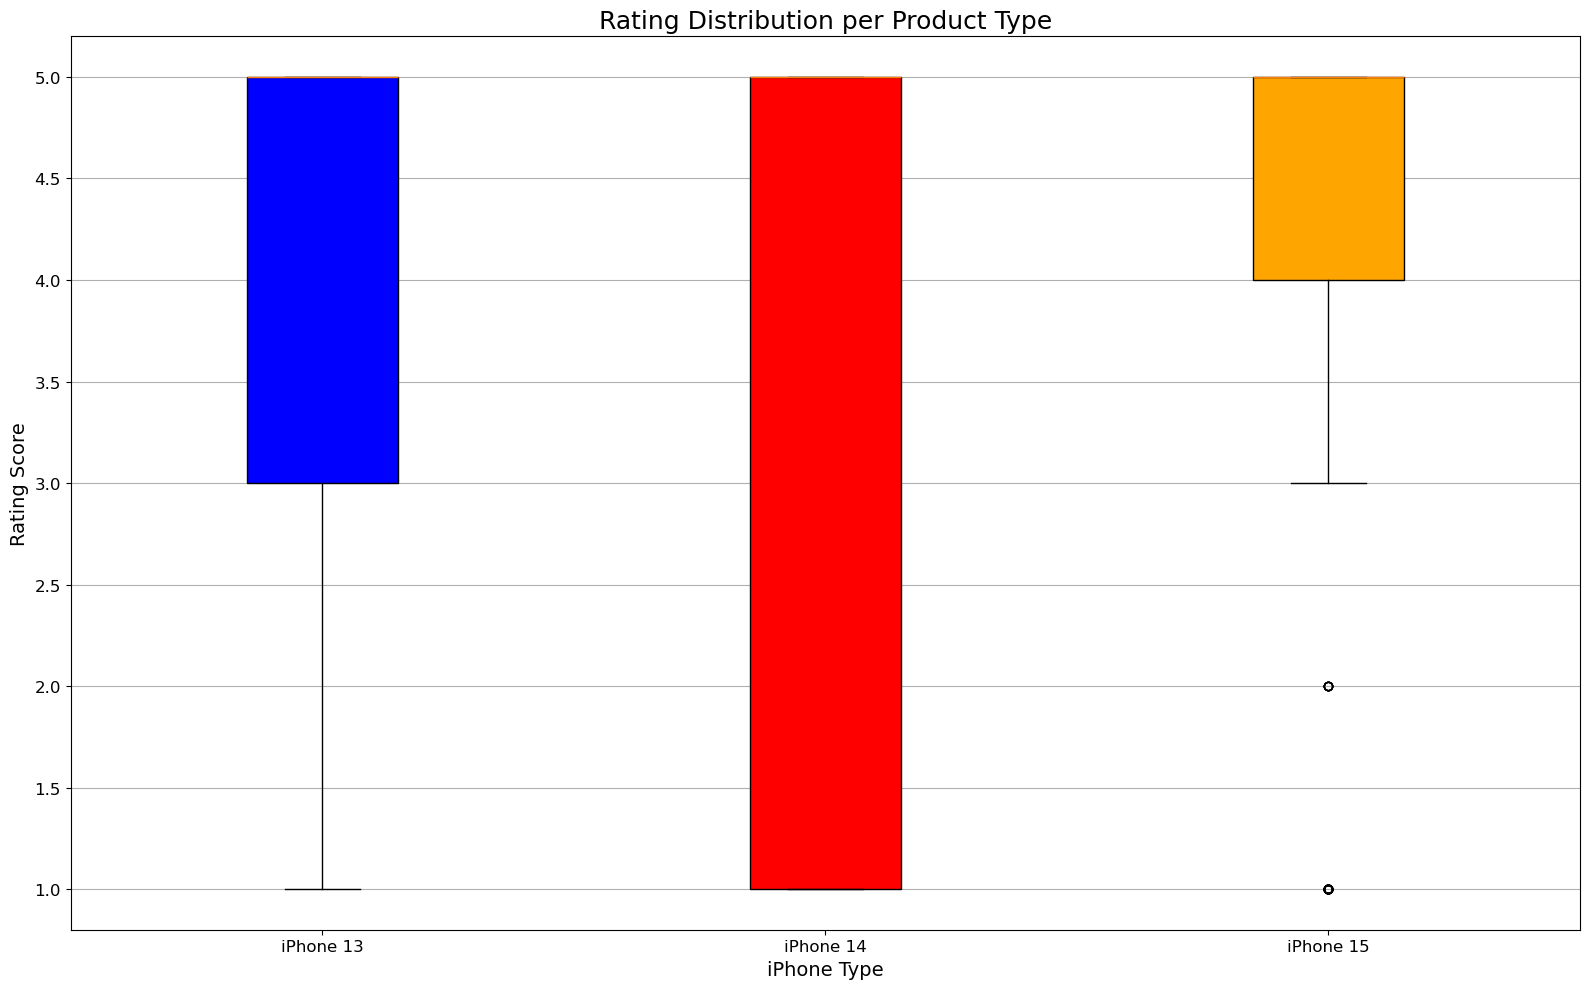

In [105]:
# Versi dan warna
iphone_versions = ['13', '14', '15']
color_map = {'13': 'blue', '14': 'red', '15': 'orange'}

data_to_plot = []
labels = []
colors = []

for version in iphone_versions:
    group = df[df['productType'].str.contains(f'iPhone {version}', case=False, na=False)]
    scores = group['ratingScore'].dropna()
    if not scores.empty:
        data_to_plot.append(scores)
        labels.append(f'iPhone {version}')
        colors.append(color_map[version])

# Plot dengan ukuran besar
plt.figure(figsize=(16, 10))
box = plt.boxplot(data_to_plot, patch_artist=True, labels=labels)

# Warna boxplot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Detail visualisasi
plt.title("Rating Distribution per Product Type", fontsize=18)
plt.xlabel("iPhone Type", fontsize=14)
plt.ylabel("Rating Score", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Distribusi rating Iphone 13 berkisar di antara [rating 3 - 5 hal ini mengindikasikan bahwa reviewer merasa tingkat kepuasan atau persetujuan yang positif atau memadai terhadap Iphone 13](https://dqlab.id/statistika-yuk-kenalan-dengan-4-jenis-skala-self-report#:~:text=Contoh%20skala%20likert%20yang%20sering%20digunakan:%20*,Puas%2C%20Tidak%20Puas%2C%20Cukup%2C%20Puas%2C%20Sangat%20Puas.). Sementara untuk Iphone 15 distribusi rating berada pada rentang 4 - 5 lebih tinggi dari Iphone 13 sedangkan untuk Iphone 14 distribusi rating berada pada semua rating yaitu 1-5.   

## 4. Reviewed Length

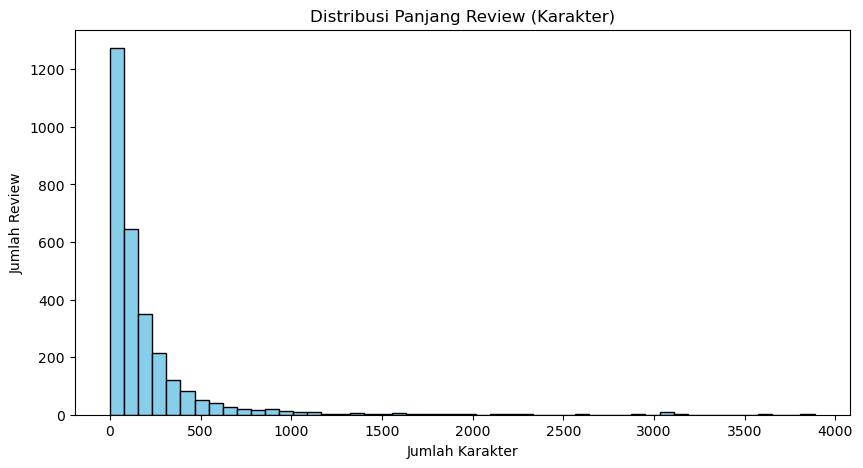

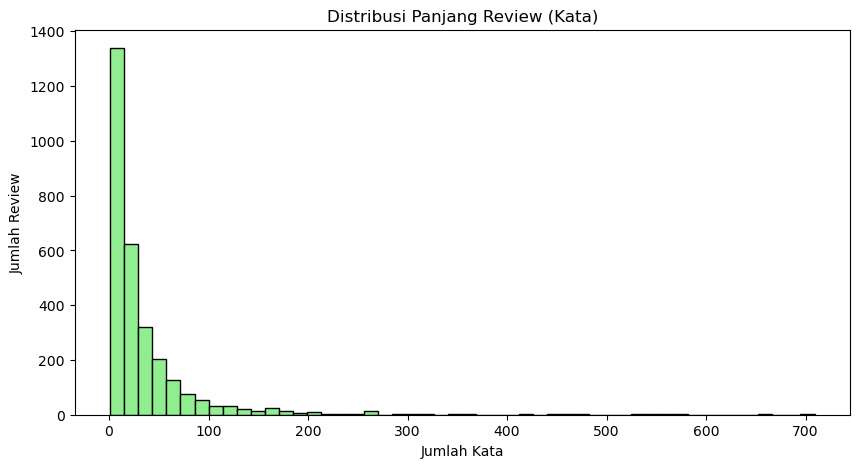

In [81]:
df["review_char_length"] = df["reviewDescription"].apply(len)
df["review_word_count"] = df["reviewDescription"].apply(lambda x: len(x.split()))

df[["review_char_length", "review_word_count"]].describe()

# Distribusi karakter
plt.figure(figsize=(10, 5))
plt.hist(df["review_char_length"], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribusi Panjang Review (Karakter)")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Jumlah Review")
plt.show()

# Distribusi kata
plt.figure(figsize=(10, 5))
plt.hist(df["review_word_count"], bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribusi Panjang Review (Kata)")
plt.xlabel("Jumlah Kata")
plt.ylabel("Jumlah Review")
plt.show()

In [82]:
# Review sangat pendek (<= 5 kata)
short_reviews = df[df["review_word_count"] <= 5][["reviewDescription", "review_word_count"]]

# Review sangat panjang (>= 50 kata, bisa kamu sesuaikan)
long_reviews = df[df["review_word_count"] >= 50][["reviewDescription", "review_word_count"]]

short_reviews

,reviewDescription,review_word_count
3,100% genuine,2
5,5 star 👍,3
7,Good product 😀💯,3
8,Nice product,2
9,Excellent product,2
...,...,...
2931,Mobile is hanging,3
2937,Charging adopters not received,4
2948,Seal broken,2
2954,Phone display not working.Fraud,4


In [83]:
long_reviews

,reviewDescription,review_word_count
0,"Every thing is good about iPhones, there's not...",74
2,I tried to flip camera while recording but no ...,91
10,My honest review after going broke buying this...,470
15,Though we talk a lot about high price for iPho...,149
16,Works just fine nothing special the camera is ...,58
...,...,...
2910,"As a first time iPhone user, I was very confus...",103
2939,Good phone from apple but amazon running big s...,55
2942,This was my first iPhone purchase and it was w...,138
2946,It is a brand new phone and it is overheating ...,96


Distribusi panjang review dalam dataset ini menunjukkan bahwa mayoritas review memiliki jumlah karakter dan jumlah kata yang relatif pendek. Berdasarkan visualisasi, sebagian besar review terdiri kurang dari 300 karakter dan kurang dari 50 kata, dengan puncak distribusi berada di kisaran sangat pendek (sekitar 10–20 kata). Distribusi yang sangat miring ke kanan ini menandakan bahwa hanya sebagian kecil pengguna yang menulis ulasan panjang dan mendalam. Bedbasarkan beberapa contoh kalimat pada tabel yang ditampilkan jumlah kata yang pendek memiliki review yang singkat dan jelas bahwa reviewer menyukai produk yang dimiliki, namun untuk review dengan jumlah kalimat yang panjang, kalimat review berupa kepuasan terhadap produk namun terdapat beberapa ketidak puasan terhadap produk pada bagian tertentu.

## 5. Distribution Reviewed : Verified vs Not Verified

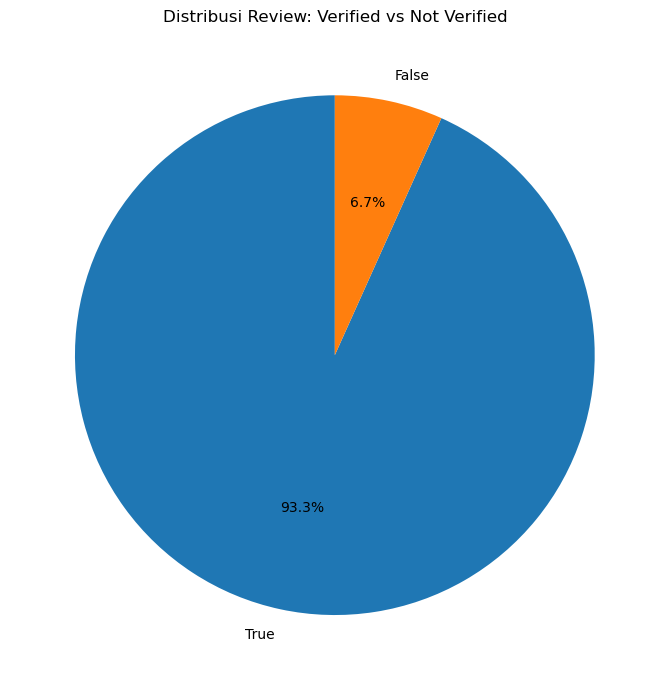

In [84]:
# Hitung distribusi review berdasarkan status verifikasi (isVerified)
verified_counts = df['isVerified'].value_counts().reset_index()
verified_counts.columns = ['verified_status', 'review_count']

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(verified_counts['review_count'], labels=verified_counts['verified_status'], autopct='%1.1f%%', startangle=90)
plt.title("Distribusi Review: Verified vs Not Verified")
plt.tight_layout()
plt.show()

Hasil analisis menunjukkan bahwa sekitar 93,3% pengguna yang memberikan ulasan merupakan akun yang telah terverifikasi. Artinya, mayoritas review yang ditampilkan dapat dianggap lebih kredibel dan dapat dipercaya. Hal ini sejalan dengan pernyataan **Bharat Singh**, seorang SPS di Amazon, yang menyebutkan bahwa:

    “Seseorang hanya dapat menulis ulasan terverifikasi jika benar-benar melakukan pembelian produk tersebut terlebih dahulu. Hanya Amazon yang dapat memverifikasi ulasan ini, dan reviewer harus memenuhi syarat tertentu yang telah ditetapkan oleh Amazon agar review-nya dapat diberi label 'verified review'.”

Dengan demikian, proporsi ulasan yang tinggi dari akun terverifikasi menjadi indikasi positif bahwa mayoritas feedback berasal dari pembeli yang sah dan relevan.